## DATA INTAKE AND EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import DataFrame, cut
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from datetime import datetime

In [2]:
df = pd.read_csv('Cab_Data.csv')
df2 = pd.read_csv('City.csv')
df3 = pd.read_csv('Customer_ID.csv')
df4 = pd.read_csv('Transaction_ID.csv')

In [3]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
#Changed the format of the date to reflect both the date and time
df['Date_of_Travel'] = pd.to_datetime(df.Date_of_Travel)
df.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction_ID  359392 non-null  int64         
 1   Date_of_Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM_Travelled    359392 non-null  float64       
 5   Price_Charged   359392 non-null  float64       
 6   Cost_of_Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
df2.Users = df2.Users.str.replace(",", "")
df2.Population = df2.Population.str.replace(",", "")

In [7]:
# Transform the value of users to int value so we can use it for statistical functions
df2['Users']=df2['Users'].astype(np.int64)
df2['Population']=df2['Population'].astype(np.int64)
df2.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [10]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [11]:
df2.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [12]:
df3.columns = df3.columns.str.replace(' ', '_')
df3.head()

,Customer_ID,Gender,Age,Income_(USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [13]:
df4.columns = df4.columns.str.replace(' ', '_')
df4.head()

,Transaction_ID,Customer_ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [14]:
df.isnull().sum()

Transaction_ID    0
Date_of_Travel    0
Company           0
City              0
KM_Travelled      0
Price_Charged     0
Cost_of_Trip      0
dtype: int64

In [15]:
df2.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [16]:
df3.isnull().sum()

Customer_ID           0
Gender                0
Age                   0
Income_(USD/Month)    0
dtype: int64

In [75]:
df.describe()
# Outliers most likely present in price charged as the mean shows a significant deviation from the maximum value
# However, the values are not completely far-fetched compared to the rest of the data 
# These values are retained so as to maximize the efforts of the analysis

,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip
count,359392.0,359392.0,359392.0,359392.0
mean,10220761.185363058,22.567254084676346,423.44331125901533,286.19011282443694
std,126805.80371473795,12.23352592629152,274.37891144619454,157.99366115175172
min,10000011.0,1.9,15.6,19.0
25%,10110809.75,12.0,206.4375,151.2
50%,10221035.5,22.44,386.36,282.48
75%,10330937.25,32.96,583.66,413.6832
max,10440107.0,48.0,2048.03,691.2


In [18]:
df2.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [19]:
df3.describe()

,Customer_ID,Age,Income_(USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [20]:
result = pd.merge(df,df2, on="City")
result.head()
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction_ID  359392 non-null  int64         
 1   Date_of_Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM_Travelled    359392 non-null  float64       
 5   Price_Charged   359392 non-null  float64       
 6   Cost_of_Trip    359392 non-null  float64       
 7   Population      359392 non-null  int64         
 8   Users           359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 27.4+ MB


In [21]:
stack1 = pd.merge(result,df4, on="Transaction_ID")
stack1.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Customer_ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885,24701,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885,24701,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885,24701,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885,24701,27182,Card


In [22]:
full_df = pd.merge(stack1,df3, on="Customer_ID")
final_df = full_df.sort_values(by=['Date_of_Travel'], ascending=True)
final_df.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month)
12812,10000429,2016-01-02,Yellow Cab,BOSTON MA,15.15,342.62,205.4340,248968,80021,57474,Card,Male,34,16558
43828,10000525,2016-01-02,Yellow Cab,CHICAGO IL,2.18,51.47,26.4216,1955130,164468,4551,Cash,Male,19,6316
297325,10001234,2016-01-02,Yellow Cab,SEATTLE WA,39.60,1119.67,541.7280,671238,25063,38146,Cash,Male,36,6577
316639,10001311,2016-01-02,Yellow Cab,WASHINGTON DC,34.65,707.94,474.0120,418859,127001,53048,Card,Male,23,31566
171893,10000927,2016-01-02,Yellow Cab,NEW YORK NY,34.56,1121.11,485.2224,8405837,302149,1808,Cash,Male,59,18999


In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 12812 to 87418
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359392 non-null  int64         
 1   Date_of_Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM_Travelled        359392 non-null  float64       
 5   Price_Charged       359392 non-null  float64       
 6   Cost_of_Trip        359392 non-null  float64       
 7   Population          359392 non-null  int64         
 8   Users               359392 non-null  int64         
 9   Customer_ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income_(USD/Month)  359392

In [24]:
# final_df.to_csv('C:/Users/yomio/Downloads/final_df.csv', index = False)

## Analysis

Text(0.5, 0, 'Cost of Trip')

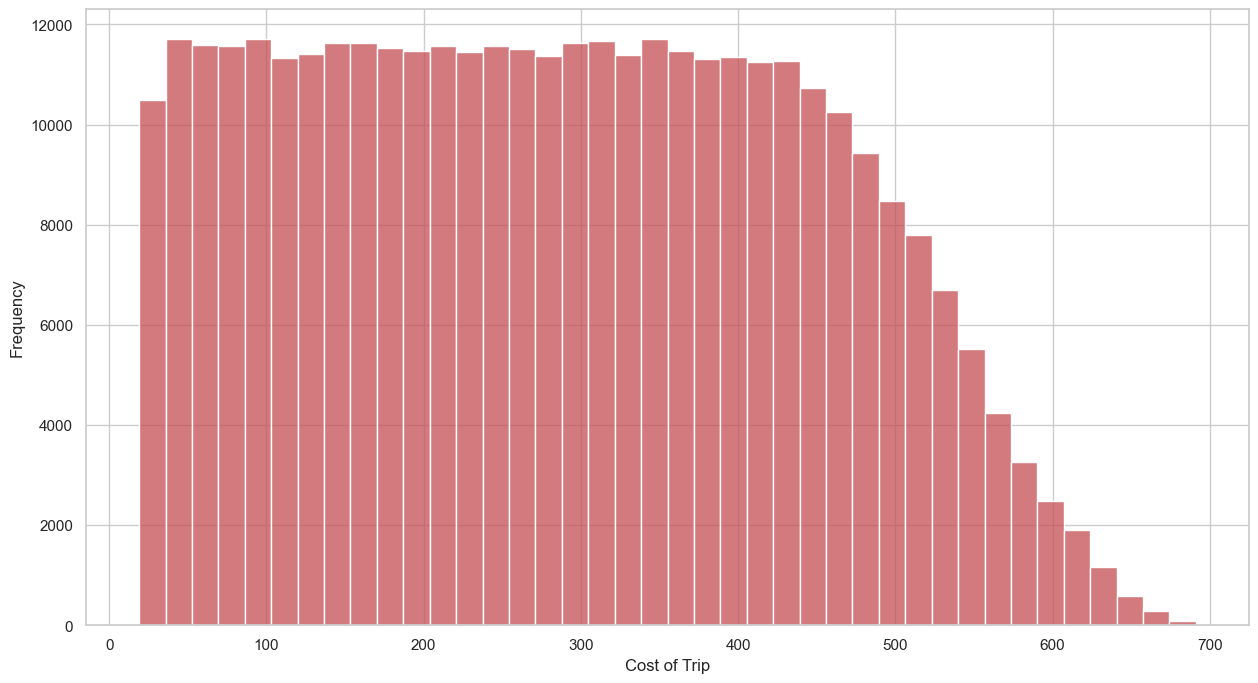

In [146]:
plt.figure(figsize=(15,8))
sns.histplot(data= final_df,x="Cost_of_Trip", bins=40, color= 'r')
plt.ylabel('Frequency')
plt.xlabel('Cost of Trip')

Text(0.5, 0, 'Price Charged')

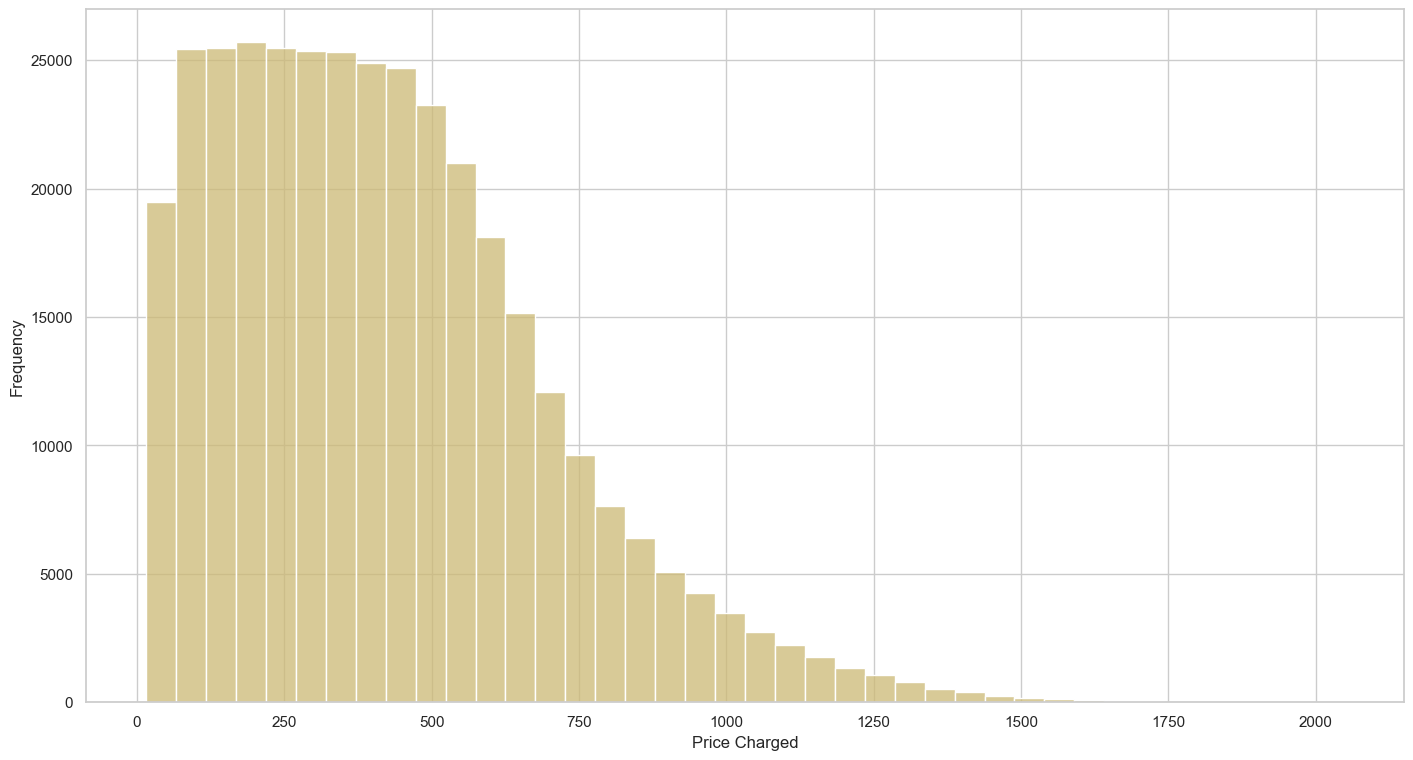

In [147]:
plt.figure(figsize=(17,9))
sns.histplot(data=final_df, x="Price_Charged",bins=40 , color= 'y')
plt.ylabel('Frequency')
plt.xlabel('Price Charged')

<AxesSubplot: xlabel='Gender', ylabel='count'>

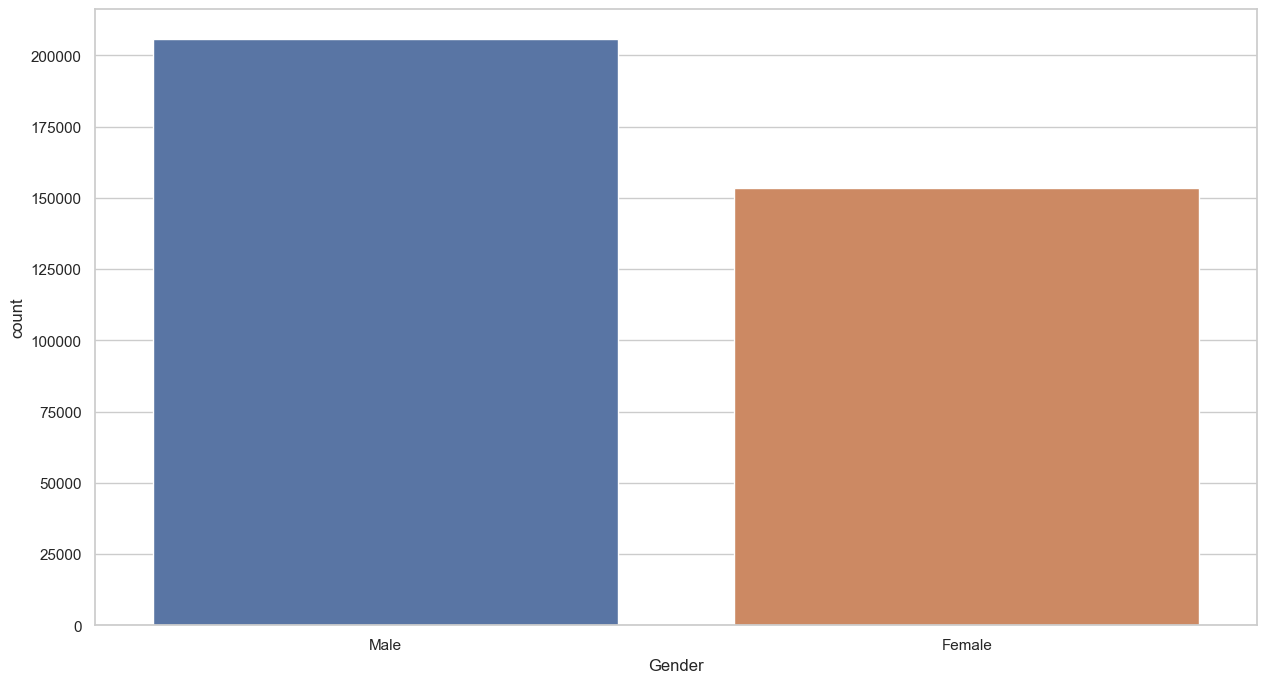

In [153]:
sns.set_theme(style="whitegrid")
fig, ax  = plt.subplots(figsize=(15,8))
plt.xticks(rotation = 'horizontal')
# sns.barplot(x=final_df['Gender'], y=final_df['Transaction_ID'])
sns.countplot(x=final_df["Gender"])

<AxesSubplot: xlabel='Payment_Mode', ylabel='count'>

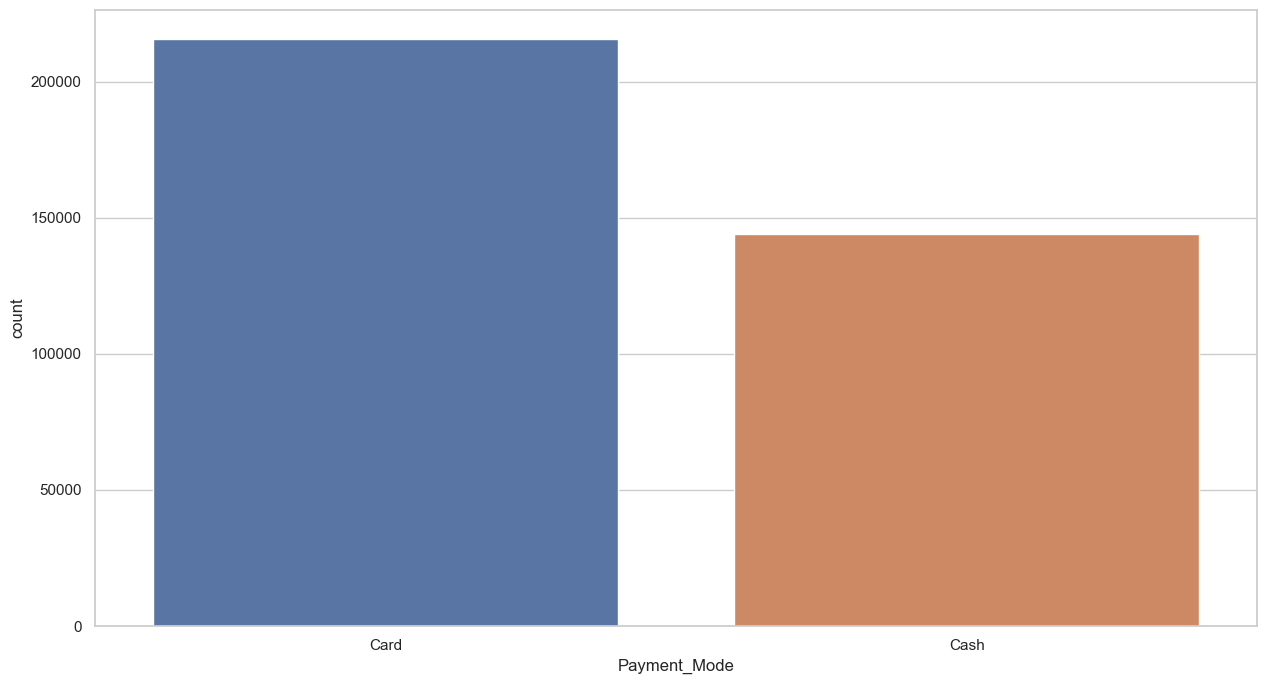

In [155]:
sns.set_theme(style="whitegrid")
fig, ax  = plt.subplots(figsize=(15,8))
plt.xticks(rotation = 'horizontal')
# sns.barplot(x=final_df['Gender'], y=final_df['Transaction_ID'])
sns.countplot(x=final_df["Payment_Mode"])

<AxesSubplot: xlabel='Gender', ylabel='count'>

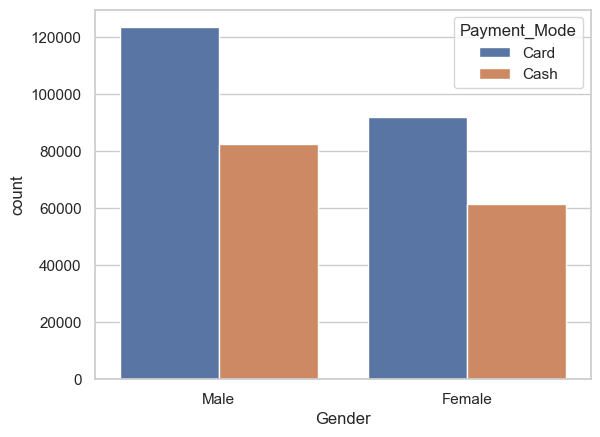

In [29]:
sns.countplot(data=final_df, x="Gender", hue="Payment_Mode")

<AxesSubplot: xlabel='Gender', ylabel='count'>

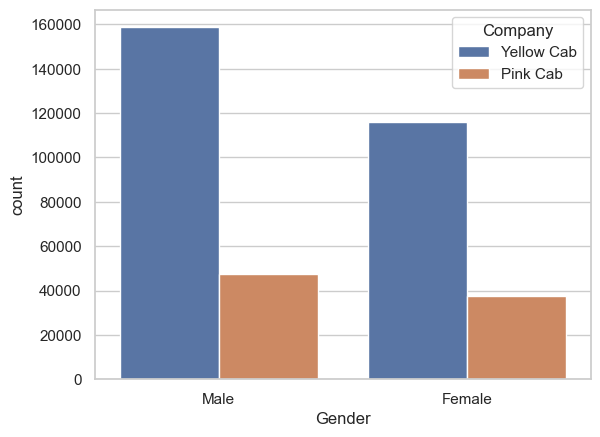

In [30]:
sns.countplot(data=final_df, x="Gender", hue="Company")
# There is a preference for yellow cabs by both male and female users

In [31]:
# fig, axes = plt.subplots(figsize=(25,7))
# sns.countplot(data=final_df, x="Date_of_Travel")

# axes.xaxis.set_tick_params(reset=True)
# axes.xaxis.set_major_locator(mdates.YearLocator(1))
# # axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


# plt.xticks(rotation = 'vertical')
# plt.show()

In [32]:
# In order to get the count of transactions by all cabs for each year we group by the transactio ids and use the datetime value to 
# get only the year, then aggregate the count of dates and reset the indexes.

df_2 = df.groupby(['Transaction_ID',final_df.Date_of_Travel.dt.year]).agg({'Date_of_Travel': 'count',}).rename(columns={'Date_of_Travel':'Date'})
df_2.reset_index(inplace=True)
df_2

,Transaction_ID,Date_of_Travel,Date
0,10000011,2016,1
1,10000012,2018,1
2,10000013,2018,1
3,10000014,2016,1
4,10000015,2018,1
...,...,...,...
359387,10440101,2018,1
359388,10440104,2018,1
359389,10440105,2018,1
359390,10440106,2018,1


<AxesSubplot: xlabel='Date_of_Travel', ylabel='count'>

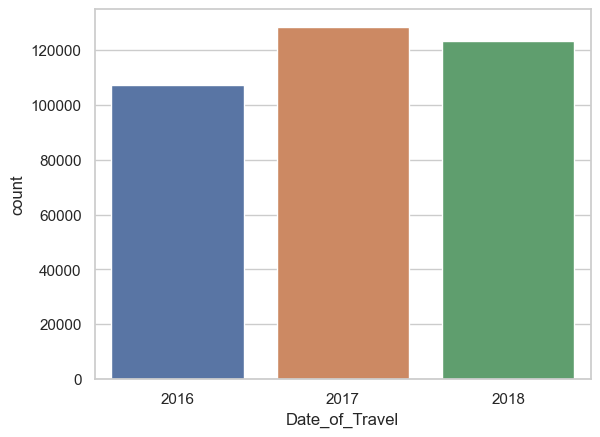

In [33]:
sns.countplot(data=df_2, x='Date_of_Travel')

In [34]:
df.groupby([final_df.Date_of_Travel.dt.year]).count()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
Date_of_Travel,,,,,,,
2016,107319,107319,107319,107319,107319,107319,107319
2017,128510,128510,128510,128510,128510,128510,128510
2018,123563,123563,123563,123563,123563,123563,123563


In [35]:
df_3 = df.groupby(['Transaction_ID','Company',final_df.Date_of_Travel.dt.year]).agg({'Date_of_Travel': 'count',}).rename(columns={'Date_of_Travel':'Date'})
df_3.reset_index(inplace=True)
df_3

,Transaction_ID,Company,Date_of_Travel,Date
0,10000011,Pink Cab,2016,1
1,10000012,Pink Cab,2018,1
2,10000013,Pink Cab,2018,1
3,10000014,Pink Cab,2016,1
4,10000015,Pink Cab,2018,1
...,...,...,...,...
359387,10440101,Yellow Cab,2018,1
359388,10440104,Yellow Cab,2018,1
359389,10440105,Yellow Cab,2018,1
359390,10440106,Yellow Cab,2018,1


<AxesSubplot: xlabel='Date_of_Travel', ylabel='count'>

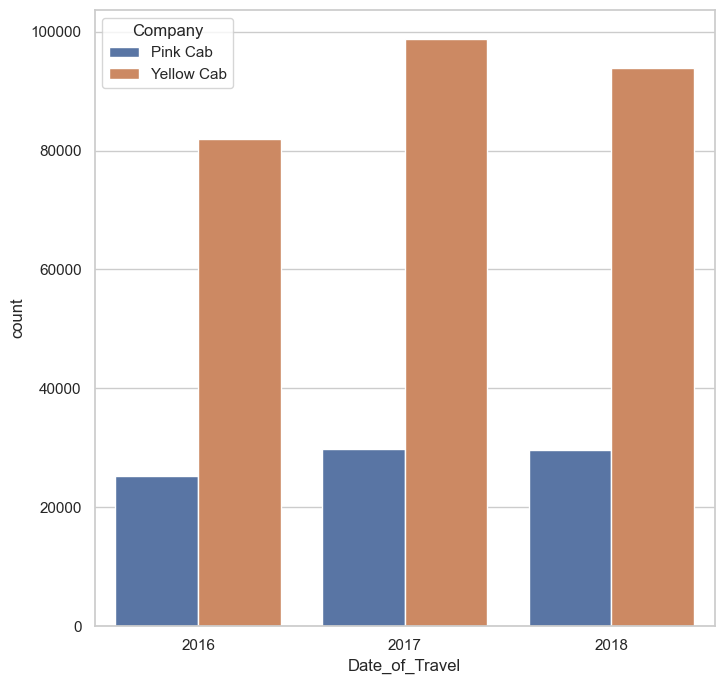

In [36]:
fig, ax  = plt.subplots(figsize=(8,8))
sns.countplot(data=df_3, x='Date_of_Travel', hue='Company')

In [37]:
df_4 = final_df.groupby(['Transaction_ID','Company','Age',final_df.Date_of_Travel.dt.year]).agg({'Date_of_Travel': 'count',}).rename(columns={'Date_of_Travel':'Date'})
df_4.reset_index(inplace=True)
df_4

,Transaction_ID,Company,Age,Date_of_Travel,Date
0,10000011,Pink Cab,28,2016,1
1,10000012,Pink Cab,27,2016,1
2,10000013,Pink Cab,53,2016,1
3,10000014,Pink Cab,23,2016,1
4,10000015,Pink Cab,33,2016,1
...,...,...,...,...,...
359387,10440101,Yellow Cab,24,2018,1
359388,10440104,Yellow Cab,32,2018,1
359389,10440105,Yellow Cab,56,2018,1
359390,10440106,Yellow Cab,32,2018,1


<AxesSubplot: xlabel='Age', ylabel='count'>

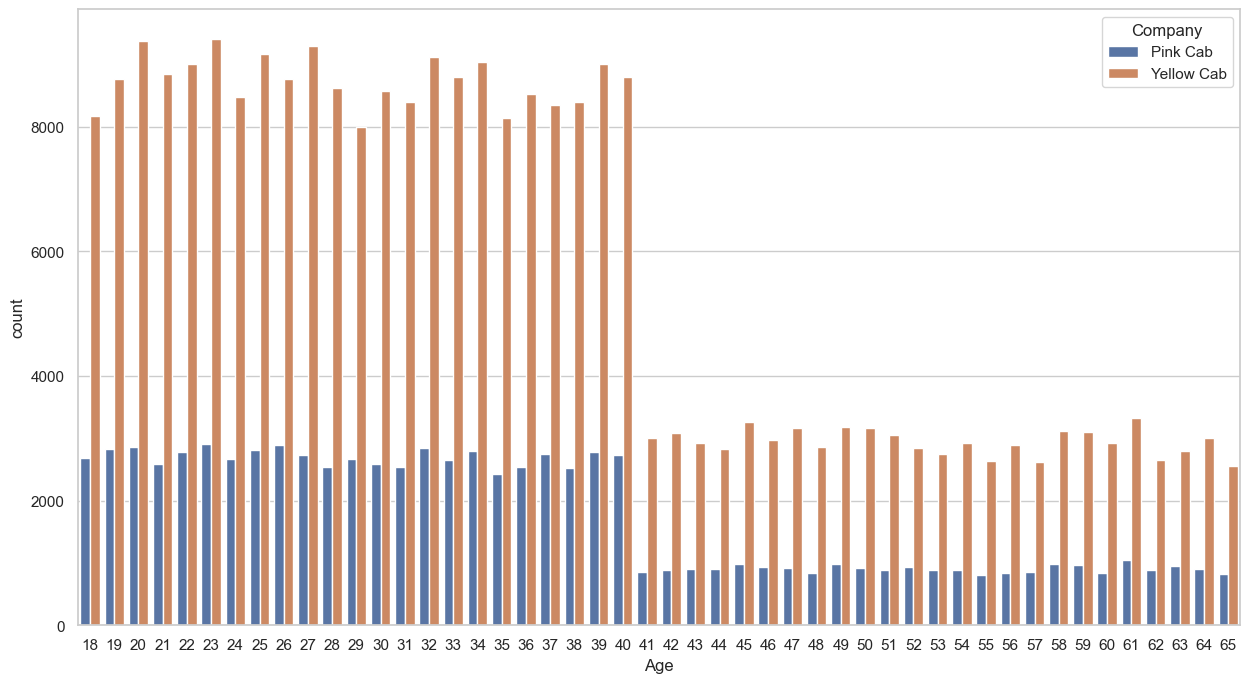

In [38]:
# We can see a common trend with all age groups in choosing the yellow cab over the pink cab
fig, ax  = plt.subplots(figsize=(15,8))
sns.countplot(data=df_4, x="Age",hue='Company')

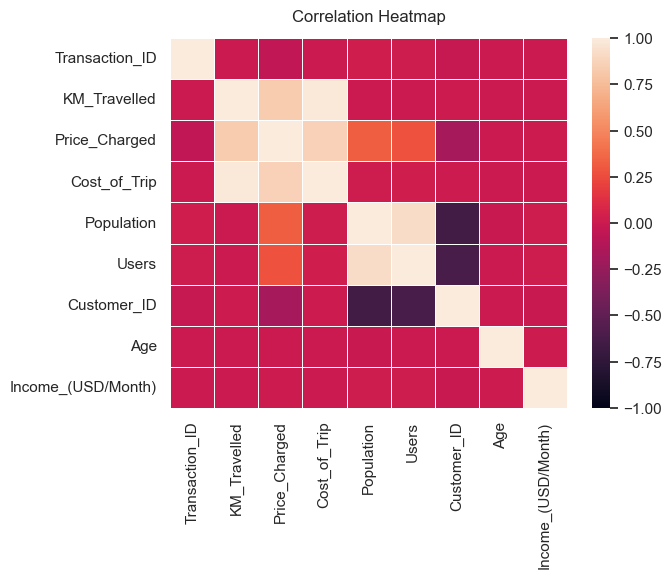

In [39]:
final_df.corr()
hmap = sns.heatmap(final_df.corr(), vmin=-1, vmax=1, linewidths=.5)
hmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Through the correlation heatmap, the first thing I observed is that there is a 1:1 relation between the transaction Id and the in

In [40]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 12812 to 87418
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359392 non-null  int64         
 1   Date_of_Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM_Travelled        359392 non-null  float64       
 5   Price_Charged       359392 non-null  float64       
 6   Cost_of_Trip        359392 non-null  float64       
 7   Population          359392 non-null  int64         
 8   Users               359392 non-null  int64         
 9   Customer_ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income_(USD/Month)  359392

<AxesSubplot: xlabel='City', ylabel='Users'>

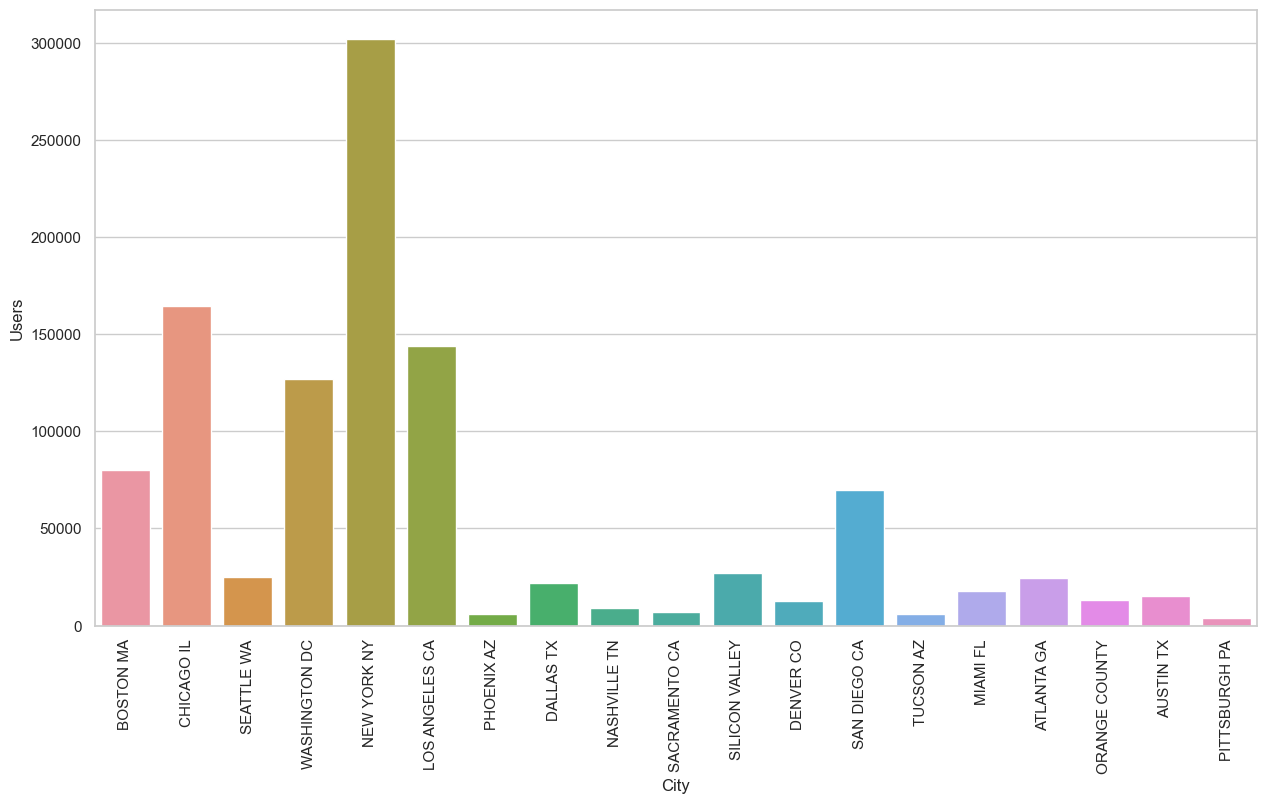

In [41]:
fig, ax  = plt.subplots(figsize=(15,8))
plt.xticks(rotation = 'vertical')
sns.barplot(data=final_df , x="City",y="Users", label="Company")
# We can see that the state with the most cab uses is New York.

In [43]:
users = final_df.groupby(['Company',final_df.Date_of_Travel.dt.year]).agg({'Customer_ID': 'count'}).rename(columns={'Customer_ID':'active_customers'})
users.reset_index(inplace=True)
users

,Company,Date_of_Travel,active_customers
0,Pink Cab,2016,25080
1,Pink Cab,2017,30321
2,Pink Cab,2018,29310
3,Yellow Cab,2016,82239
4,Yellow Cab,2017,98189
5,Yellow Cab,2018,94253


<AxesSubplot: xlabel='Date_of_Travel', ylabel='active_customers'>

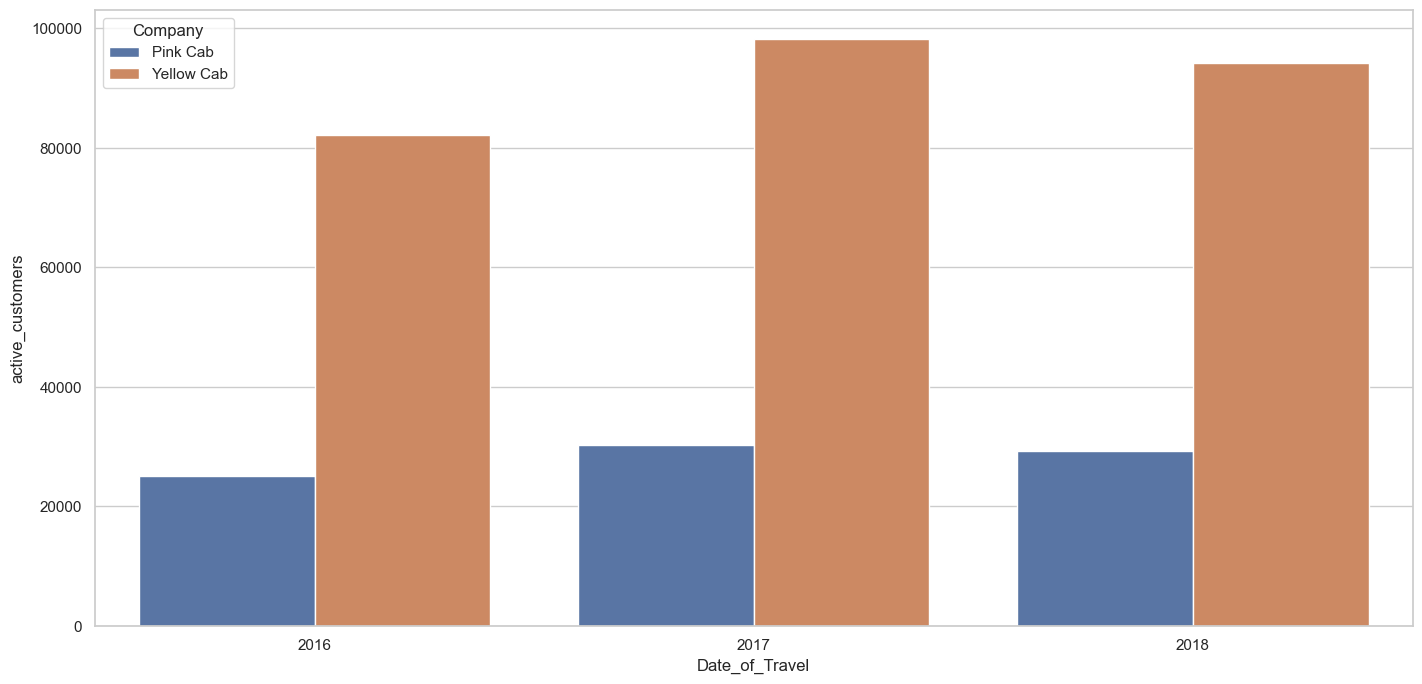

In [44]:
fig, ax  = plt.subplots(figsize=(17,8))
plt.xticks(rotation = 'horizontal')
sns.barplot(data=users , x="Date_of_Travel", y="active_customers", hue="Company")
# In the earlier plot, we saw that there was a significantly higher profit for the yellow cab over the pink cab. This chart shows
# that we have more active users  of the yellow cab which would partially explain the wide profit margin

In [142]:
final_df['age_range'] = cut(final_df['Age'], [18,24,41,61, float('inf')], labels=['18 up to 25','26 up to 40', '41 up to 60', '61 and above'])
final_df.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),age_range,Profit,percent_profit
12812,10000429,2016-01-02,Yellow Cab,BOSTON MA,15.15,342.62,205.434,248968,80021,57474,Card,Male,34,16558,26 up to 40,137.186,66.77862476513138
43828,10000525,2016-01-02,Yellow Cab,CHICAGO IL,2.18,51.47,26.4216,1955130,164468,4551,Cash,Male,19,6316,18 up to 25,25.048399999999997,94.80273715444937
297325,10001234,2016-01-02,Yellow Cab,SEATTLE WA,39.6,1119.67,541.728,671238,25063,38146,Cash,Male,36,6577,26 up to 40,577.9420000000001,106.68490460157129
316639,10001311,2016-01-02,Yellow Cab,WASHINGTON DC,34.65,707.94,474.012,418859,127001,53048,Card,Male,23,31566,18 up to 25,233.92800000000005,49.35064935064936
171893,10000927,2016-01-02,Yellow Cab,NEW YORK NY,34.56,1121.11,485.2224,8405837,302149,1808,Cash,Male,59,18999,41 up to 60,635.8875999999999,131.05075116070483


In [143]:
a_range = final_df.groupby(['age_range',final_df.Date_of_Travel.dt.year,'Company']).agg({'Customer_ID': 'count',}).rename(columns={'Customer_ID':'Customers'})
a_range.reset_index(inplace=True)
a_range.head()

,age_range,Date_of_Travel,Company,Customers
0,18 up to 25,2016,Pink Cab,4844
1,18 up to 25,2016,Yellow Cab,16046
2,18 up to 25,2017,Pink Cab,6009
3,18 up to 25,2017,Yellow Cab,19263
4,18 up to 25,2018,Pink Cab,5777


<AxesSubplot: xlabel='age_range', ylabel='Customer_ID'>

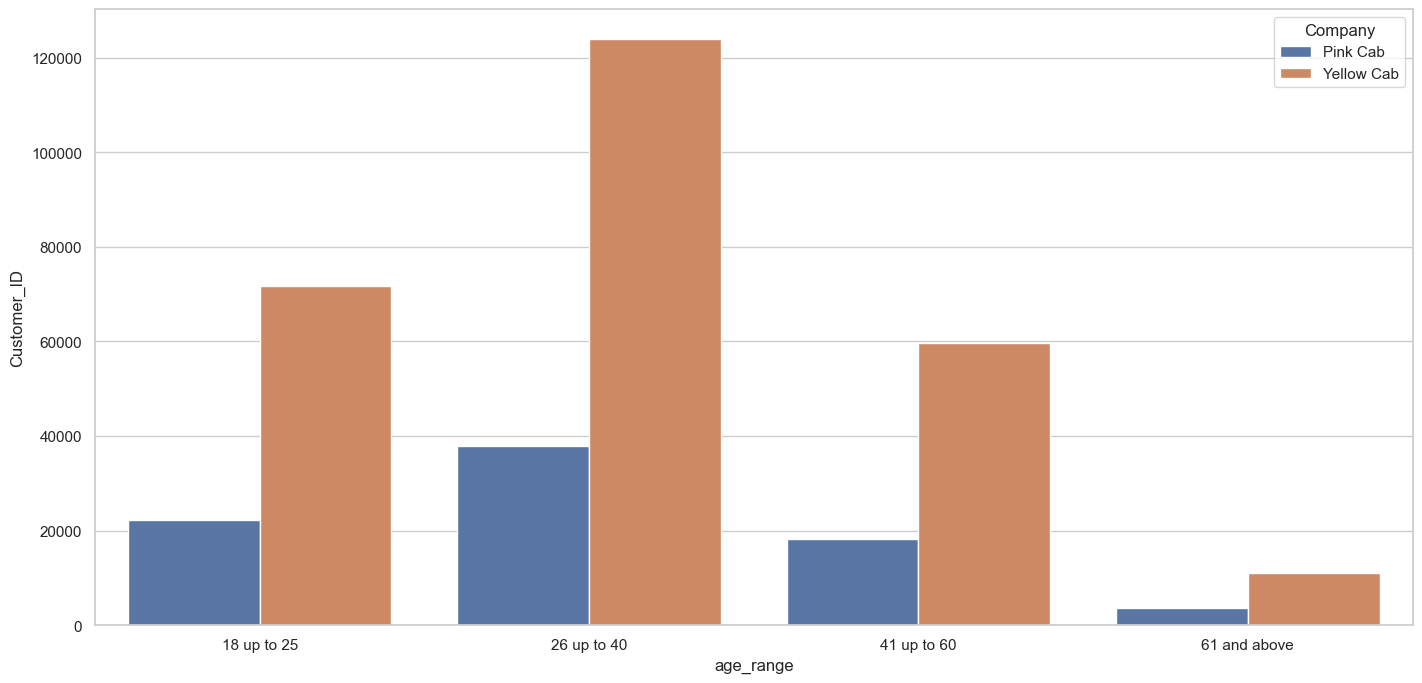

In [48]:
fig, ax  = plt.subplots(figsize=(17,8))
plt.xticks(rotation = 'horizontal')
sns.barplot(data=a_range , x="age_range", y="Customer_ID", hue="Company")
# All demographics tend to use yellow cabs more but there is a lower difference with users aged 61 and above. We can infer that 
# other demographics use cab services more and could be a arget audience for advertisements and promotions

<AxesSubplot: xlabel='age_range', ylabel='Customer_ID'>

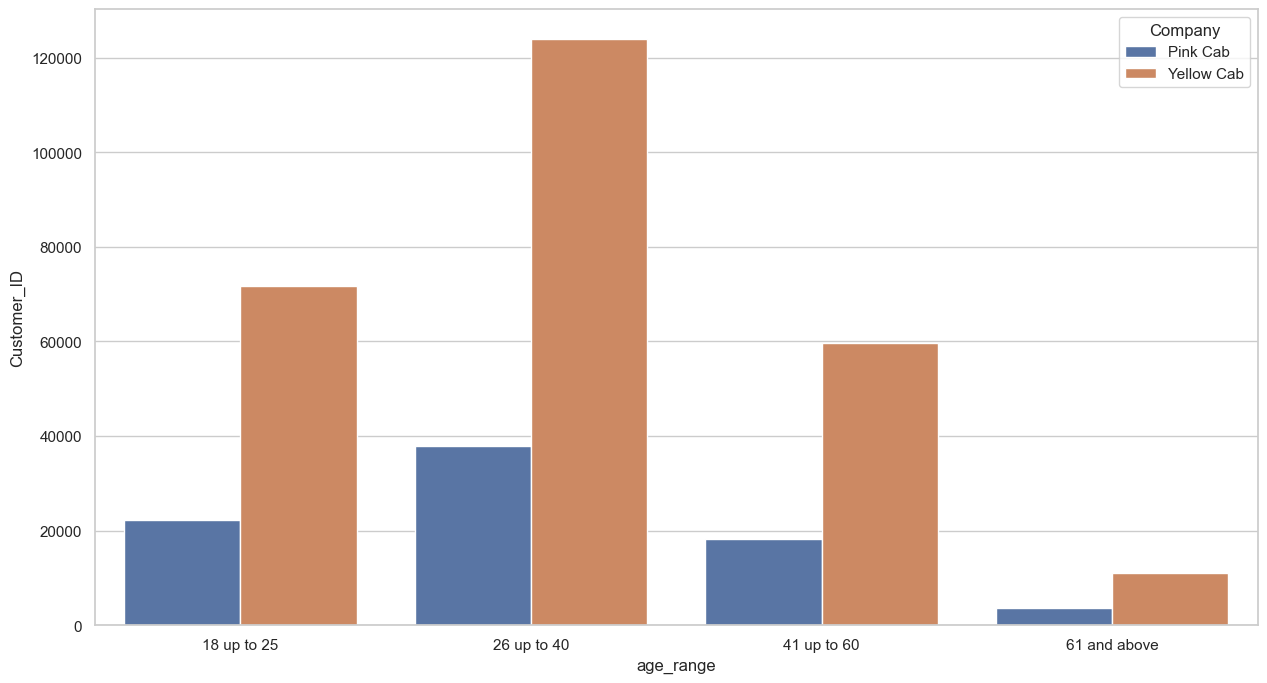

In [49]:
range2 = final_df.groupby(['age_range','Company']).agg({'Customer_ID': 'count',})
range2.reset_index(inplace=True)
range2
fig, ax  = plt.subplots(figsize=(15,8))
plt.xticks(rotation = 'horizontal')
sns.barplot(data=a_range , x="age_range",y="Customer_ID", hue="Company")

### PROFIT ANALYSIS

In [50]:
final_df['Profit'] = final_df['Price_Charged'] - final_df['Cost_of_Trip']
final_df.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),age_range,Profit
12812,10000429,2016-01-02,Yellow Cab,BOSTON MA,15.15,342.62,205.4340,248968,80021,57474,Card,Male,34,16558,26 up to 40,137.1860
43828,10000525,2016-01-02,Yellow Cab,CHICAGO IL,2.18,51.47,26.4216,1955130,164468,4551,Cash,Male,19,6316,18 up to 25,25.0484
297325,10001234,2016-01-02,Yellow Cab,SEATTLE WA,39.60,1119.67,541.7280,671238,25063,38146,Cash,Male,36,6577,26 up to 40,577.9420
316639,10001311,2016-01-02,Yellow Cab,WASHINGTON DC,34.65,707.94,474.0120,418859,127001,53048,Card,Male,23,31566,18 up to 25,233.9280
171893,10000927,2016-01-02,Yellow Cab,NEW YORK NY,34.56,1121.11,485.2224,8405837,302149,1808,Cash,Male,59,18999,41 up to 60,635.8876


<AxesSubplot: xlabel='Date_of_Travel', ylabel='Profit'>

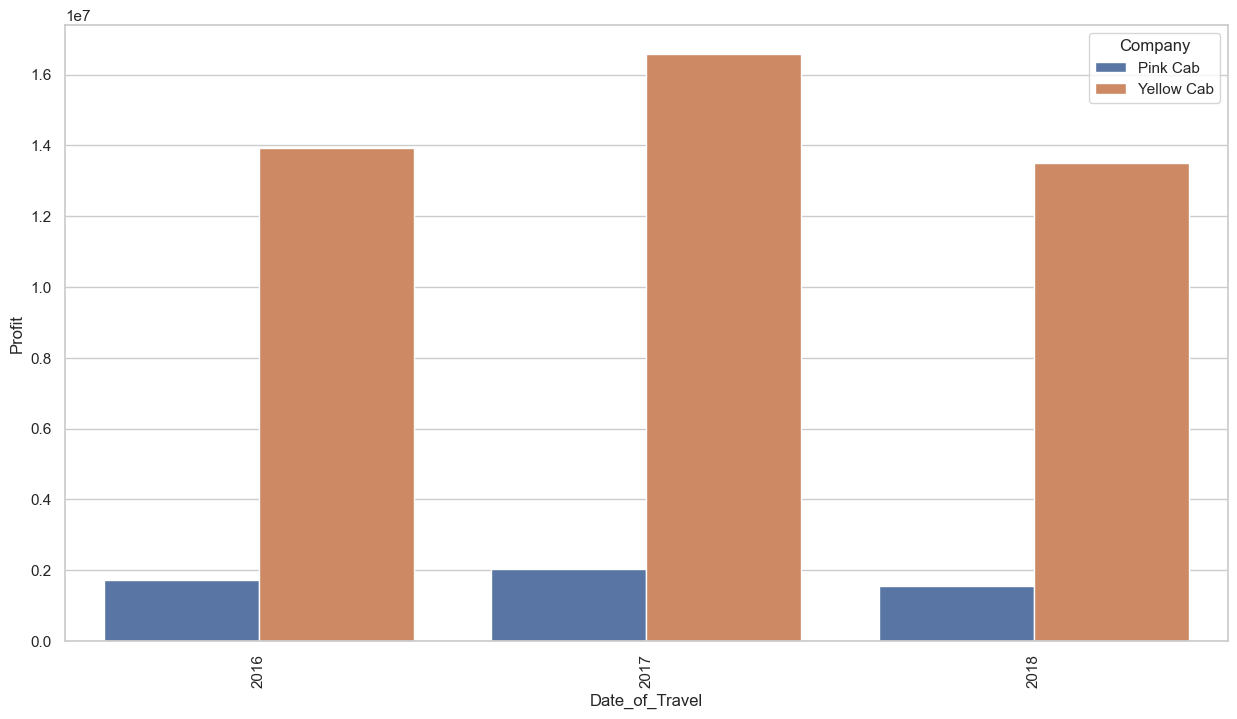

In [51]:
cprofit = final_df.groupby(['Company',final_df.Date_of_Travel.dt.year]).sum()
cprofit.reset_index(inplace=True)
cprofit.head(10)

fig, ax  = plt.subplots(figsize=(15,8))
plt.xticks(rotation = 'vertical')
sns.barplot(data=cprofit , x="Date_of_Travel",y="Profit", hue='Company')

In [52]:
# profit = final_df.groupby(['City','Company']).sum()
# profit.reset_index(inplace=True)
# profit.head(10)

# fig, ax  = plt.subplots(figsize=(15,8))
# plt.xticks(rotation = 'vertical')
# sns.barplot(data=profit , x="City",y="Profit", hue='Company')



In [53]:
final_df['percent_profit']= (final_df['Profit'] / 
                  final_df['Cost_of_Trip']) * 100
final_df.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),age_range,Profit,percent_profit
12812,10000429,2016-01-02,Yellow Cab,BOSTON MA,15.15,342.62,205.4340,248968,80021,57474,Card,Male,34,16558,26 up to 40,137.1860,66.778625
43828,10000525,2016-01-02,Yellow Cab,CHICAGO IL,2.18,51.47,26.4216,1955130,164468,4551,Cash,Male,19,6316,18 up to 25,25.0484,94.802737
297325,10001234,2016-01-02,Yellow Cab,SEATTLE WA,39.60,1119.67,541.7280,671238,25063,38146,Cash,Male,36,6577,26 up to 40,577.9420,106.684905
316639,10001311,2016-01-02,Yellow Cab,WASHINGTON DC,34.65,707.94,474.0120,418859,127001,53048,Card,Male,23,31566,18 up to 25,233.9280,49.350649
171893,10000927,2016-01-02,Yellow Cab,NEW YORK NY,34.56,1121.11,485.2224,8405837,302149,1808,Cash,Male,59,18999,41 up to 60,635.8876,131.050751


In [54]:
yprofit = final_df.groupby(["Company",final_df.Date_of_Travel.dt.year.rename('Year')]).agg({"Profit" : "sum"})[["Profit"]].rename(columns={'Company':'company'})
yprofit.reset_index(inplace=True)
yprofit.head()

,Company,Year,Profit
0,Pink Cab,2016,1.713511e+06
1,Pink Cab,2017,2.033655e+06
2,Pink Cab,2018,1.560162e+06
3,Yellow Cab,2016,1.392700e+07
4,Yellow Cab,2017,1.657598e+07


In [55]:
# Yearly percentage calculation
yy = final_df.groupby(["Company",final_df.Date_of_Travel.dt.year.rename('Year')]).agg({"Profit" : "sum","Cost_of_Trip":"sum"})[["Profit","Cost_of_Trip"]]
yy.reset_index(inplace=True)
# Percentage profit made by the yellow cab company is significantly higher than that of the pink cab company
yy['Profit%'] = (yy['Profit']/yy['Cost_of_Trip'])*100
yy.head()

,Company,Year,Profit,Cost_of_Trip,Profit%
0,Pink Cab,2016,1.713511e+06,6.194968e+06,27.659727
1,Pink Cab,2017,2.033655e+06,7.544975e+06,26.953767
2,Pink Cab,2018,1.560162e+06,7.280980e+06,21.427914
3,Yellow Cab,2016,1.392700e+07,2.455414e+07,56.719546
4,Yellow Cab,2017,1.657598e+07,2.924293e+07,56.683707


In [56]:
ym = final_df.groupby(["Company",final_df.Date_of_Travel.dt.to_period('M').rename('Date')]).agg({"Profit" : "sum","Cost_of_Trip":"sum"})[["Profit","Cost_of_Trip"]]
ym.reset_index(inplace=True)
# Percentage profit made by the yellow cab company is significantly higher than that of the pink cab company
ym['Profit%'] = (ym['Profit']/ym['Cost_of_Trip'])*100
ym.head(10)

,Company,Date,Profit,Cost_of_Trip,Profit%
0,Pink Cab,2016-01,73952.863,231283.907,31.974928
1,Pink Cab,2016-02,87475.544,257046.316,34.031044
2,Pink Cab,2016-03,87801.183,307089.187,28.591428
3,Pink Cab,2016-04,82591.853,300485.657,27.486122
4,Pink Cab,2016-05,61550.958,385680.802,15.959041
5,Pink Cab,2016-06,71103.252,432045.448,16.457355
6,Pink Cab,2016-07,105912.738,532706.442,19.882008
7,Pink Cab,2016-08,131573.364,562740.166,23.380838
8,Pink Cab,2016-09,143889.421,697644.329,20.625040
9,Pink Cab,2016-10,240114.858,813409.192,29.519565


In [57]:
profitdf = final_df.groupby(["Company",]).agg({"Profit" : "sum","Cost_of_Trip":"sum"})[["Profit","Cost_of_Trip"]]
# Percentage profit made by the yellow cab company is significantly higher than that of the pink cab company
pd.set_option('display.float_format', str)
profitdf.head()

,Profit,Cost_of_Trip
Company,,
Pink Cab,5307328.321,21020923.009
Yellow Cab,44020373.1708,81833514.0192


In [58]:
# Percentage profit over the duration of the data: Yellow cab makes a 53% profit in comparison to cost prices to Pink cabs 25%
(profitdf.Profit/profitdf.Cost_of_Trip)*100

Company
Pink Cab     25.247836732610146
Yellow Cab    53.79259793300801
dtype: float64

<AxesSubplot: xlabel='Year', ylabel='Profit'>

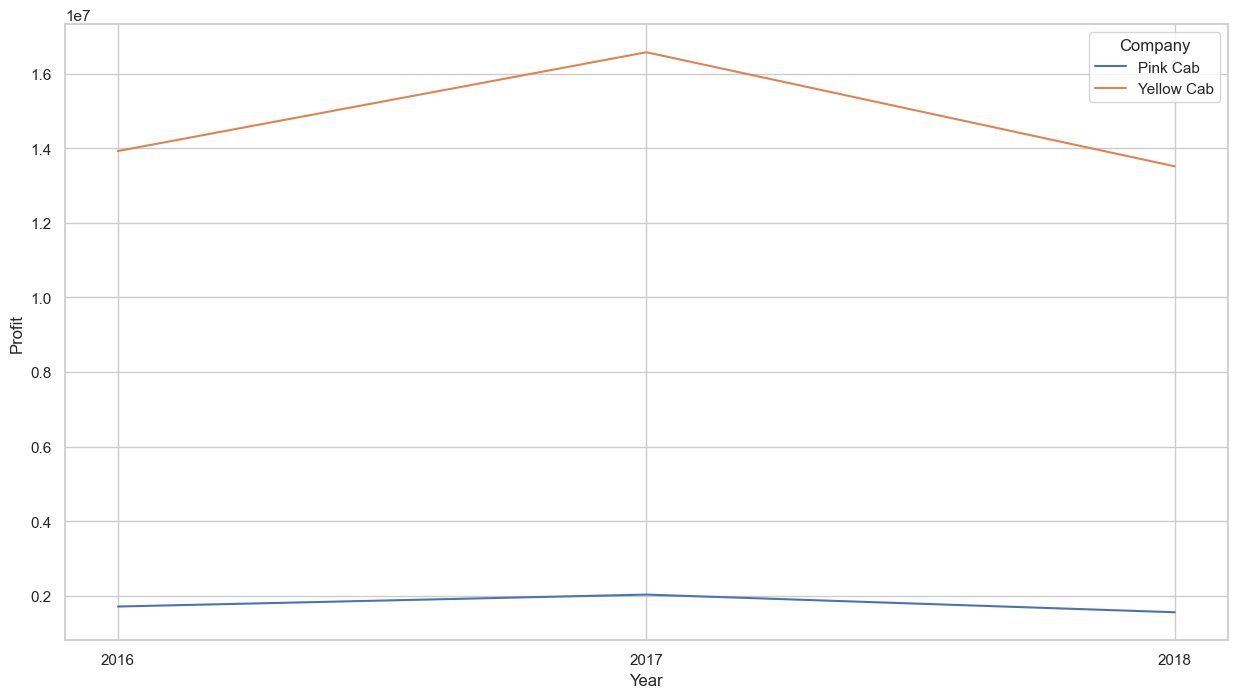

In [59]:
# Convert the year to string to prevent chart from returning float values
yprofit.Year = yprofit.Year.astype('str')

fig, ax  = plt.subplots(figsize=(15,8))
plt.xticks(rotation = 'horizontal')
sns.lineplot(data=yprofit, x="Year", y="Profit", hue="Company")



In [60]:
mprofit = final_df.groupby(["Company",final_df.Date_of_Travel.dt.to_period('M')]).agg({"Profit" : "sum"})[["Profit"]].rename(columns={'Company':'company'})
mprofit.reset_index(inplace=True)
mprofit.head()

,Company,Date_of_Travel,Profit
0,Pink Cab,2016-01,73952.863
1,Pink Cab,2016-02,87475.544
2,Pink Cab,2016-03,87801.183
3,Pink Cab,2016-04,82591.853
4,Pink Cab,2016-05,61550.958


<AxesSubplot: xlabel='Date_of_Travel', ylabel='Profit'>

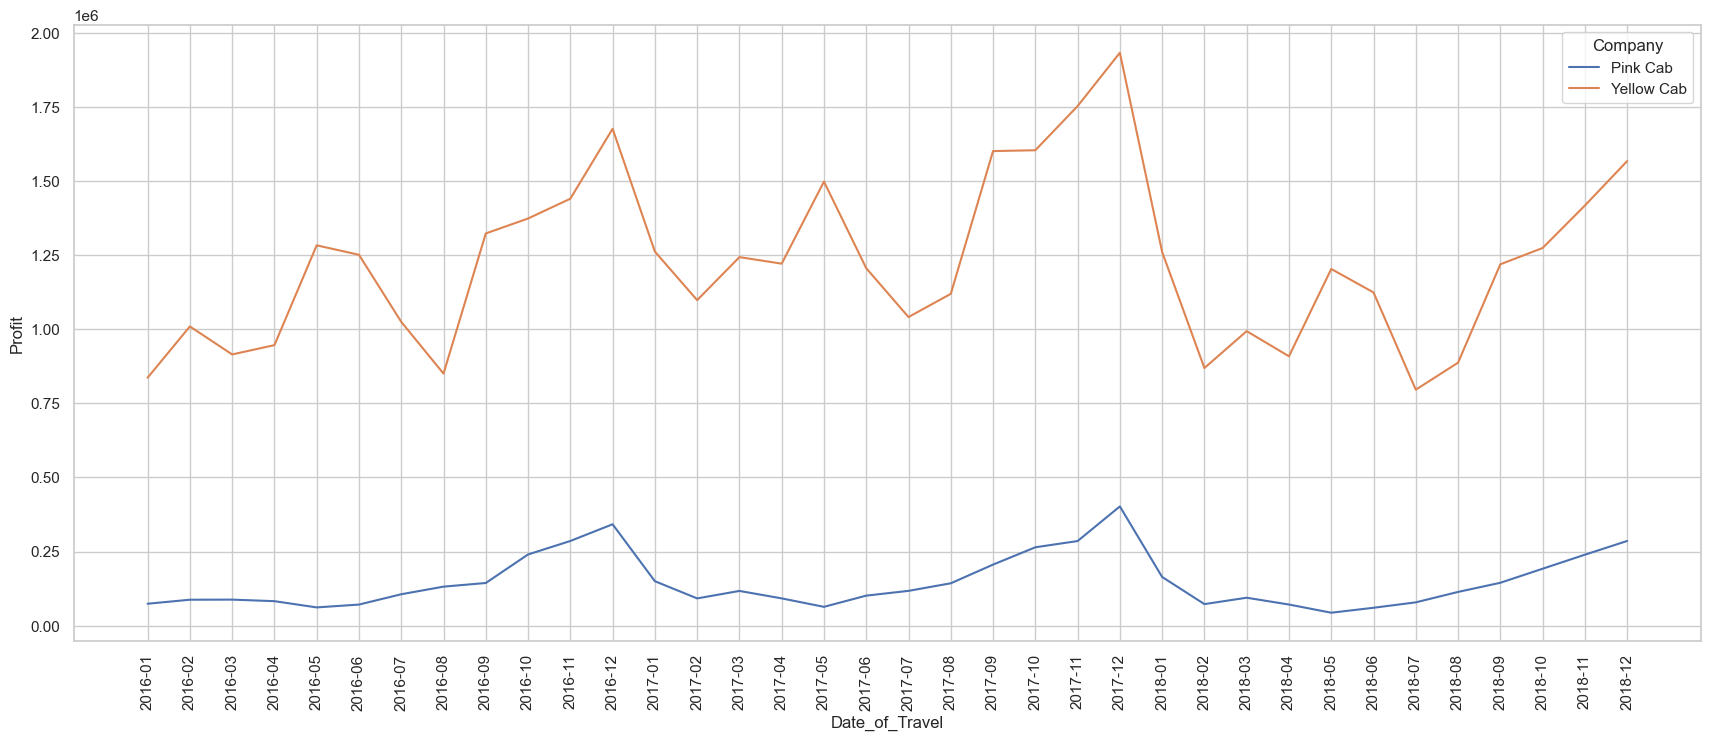

In [61]:
# Convert the period data to string to prevent chart from returning float values as the dates
mprofit.Date_of_Travel = mprofit.Date_of_Travel.astype('str')

fig, ax  = plt.subplots(figsize=(21,8))
plt.xticks(rotation = 'vertical')
sns.lineplot(data=mprofit, x="Date_of_Travel", y="Profit", hue="Company")


### Profit by City

In [62]:
# Next step is to separate the companies into separate datasets to give a clearer view of the profit by state
yellowcab= final_df[final_df.Company.isin(['Yellow Cab'])]
yellowcab.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),age_range,Profit,percent_profit
12812,10000429,2016-01-02,Yellow Cab,BOSTON MA,15.15,342.62,205.434,248968,80021,57474,Card,Male,34,16558,26 up to 40,137.186,66.77862476513138
43828,10000525,2016-01-02,Yellow Cab,CHICAGO IL,2.18,51.47,26.4216,1955130,164468,4551,Cash,Male,19,6316,18 up to 25,25.048399999999997,94.80273715444937
297325,10001234,2016-01-02,Yellow Cab,SEATTLE WA,39.6,1119.67,541.728,671238,25063,38146,Cash,Male,36,6577,26 up to 40,577.9420000000001,106.68490460157129
316639,10001311,2016-01-02,Yellow Cab,WASHINGTON DC,34.65,707.94,474.012,418859,127001,53048,Card,Male,23,31566,18 up to 25,233.92800000000005,49.35064935064936
171893,10000927,2016-01-02,Yellow Cab,NEW YORK NY,34.56,1121.11,485.2224,8405837,302149,1808,Cash,Male,59,18999,41 up to 60,635.8875999999999,131.05075116070483


In [63]:
pinkcab= final_df[final_df.Company.isin(['Pink Cab'])]
pinkcab.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),age_range,Profit,percent_profit
270976,10000163,2016-01-02,Pink Cab,PHOENIX AZ,4.44,71.57,48.84,943999,6133,22557,Cash,Male,38,8808,26 up to 40,22.72999999999999,46.53972153972152
270977,10000164,2016-01-02,Pink Cab,PHOENIX AZ,8.55,114.15,89.775,943999,6133,22469,Card,Male,37,4378,26 up to 40,24.375,27.151211361737676
167430,10000149,2016-01-02,Pink Cab,NEW YORK NY,32.64,498.6,349.248,8405837,302149,533,Card,Male,52,15974,41 up to 60,149.35200000000003,42.76388125343596
109902,10000092,2016-01-02,Pink Cab,LOS ANGELES CA,37.76,851.25,438.016,1595037,144132,8927,Card,Male,19,17197,18 up to 25,413.234,94.34221580946814
42285,10000041,2016-01-02,Pink Cab,CHICAGO IL,35.02,598.43,406.232,1955130,164468,4289,Card,Male,19,28719,18 up to 25,192.19799999999992,47.31237322515211


In [64]:
ycp = yellowcab.groupby(["Company","City"]).agg({"Profit" : "sum"})[["Profit"]].rename(columns={'Company':'company'})
ycp.reset_index(inplace=True)
ycp = ycp.sort_values(by='Profit', ascending= False)

ycp.head()

,Company,City,Profit
9,Yellow Cab,NEW YORK NY,26451080.7712
18,Yellow Cab,WASHINGTON DC,3299103.8087999998
6,Yellow Cab,LOS ANGELES CA,3285976.5808
3,Yellow Cab,CHICAGO IL,3068590.9256
2,Yellow Cab,BOSTON MA,1506717.572


In [65]:
pcp = pinkcab.groupby(["Company","City"]).agg({"Profit" : "sum"})[["Profit"]].rename(columns={'Company':'company'})
pcp.reset_index(inplace=True)
pcp = pcp.sort_values(by='Profit', ascending= False)

pcp.head()

,Company,City,Profit
9,Pink Cab,NEW YORK NY,1511474.388
6,Pink Cab,LOS ANGELES CA,1125732.065
14,Pink Cab,SAN DIEGO CA,637889.769
16,Pink Cab,SILICON VALLEY,340250.531
3,Pink Cab,CHICAGO IL,318722.488


Text(0.5, 0, 'Cities')

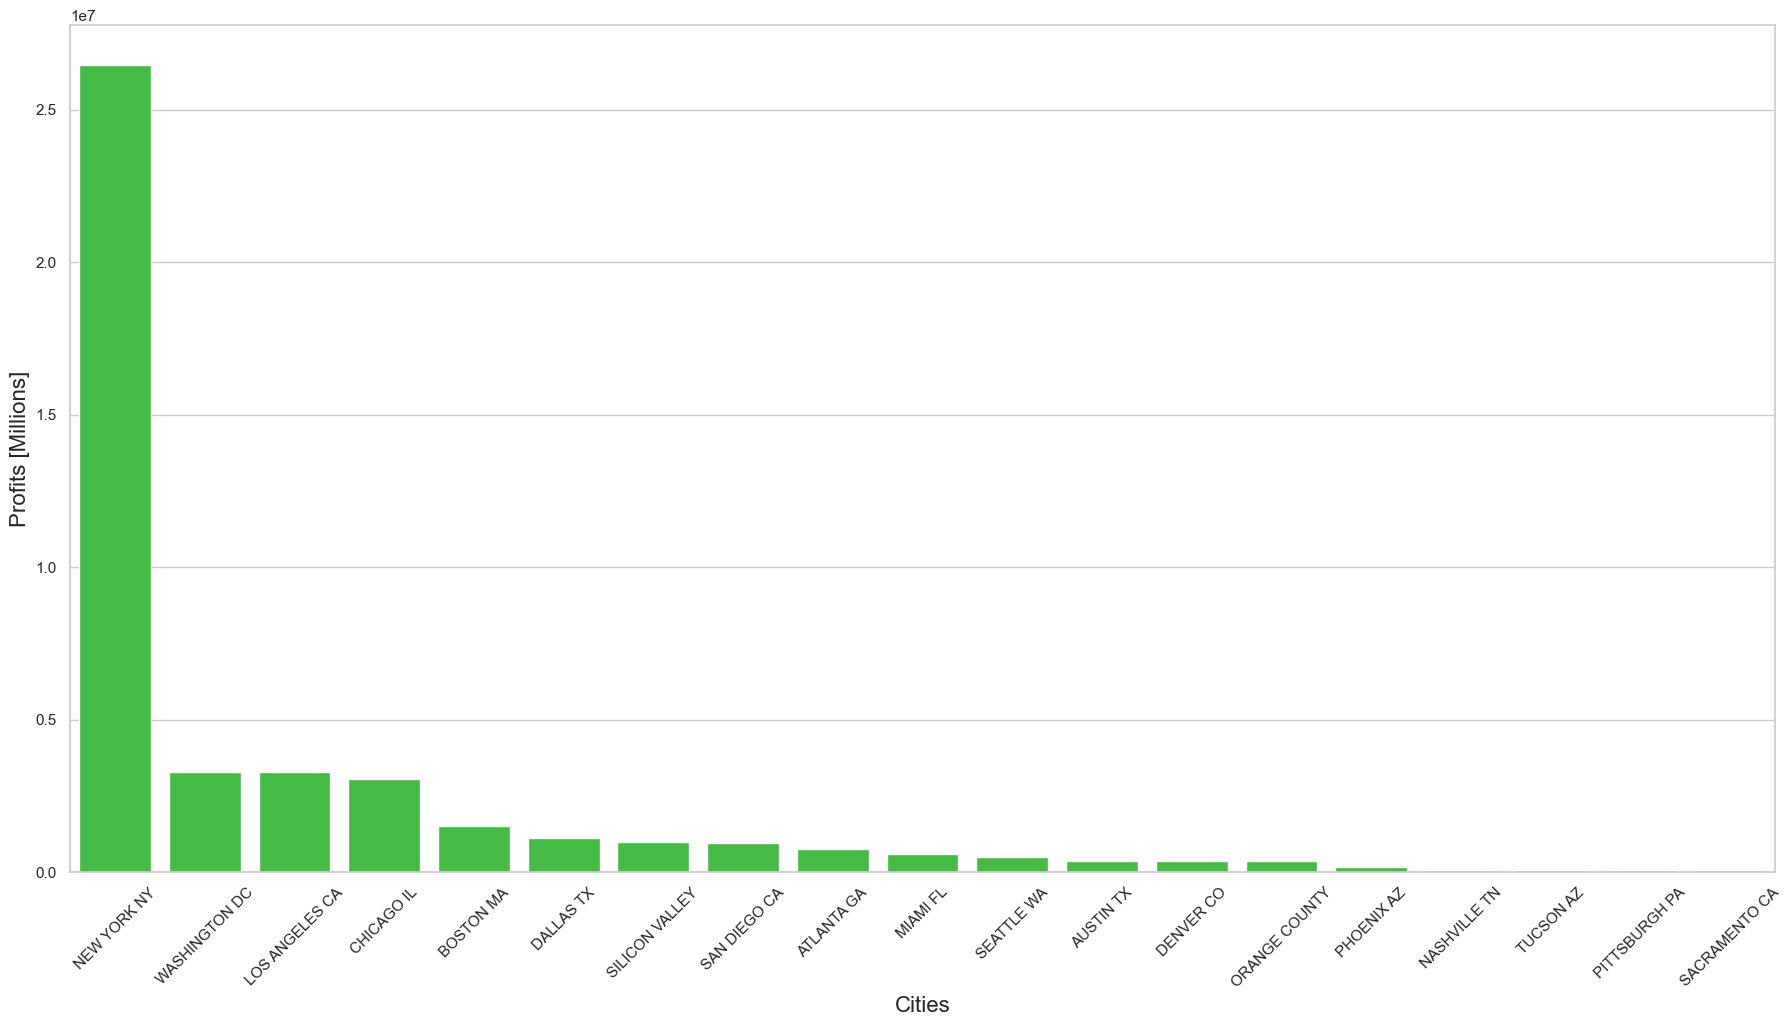

In [66]:
# Due to the number of rides taken, we expect that the yellow cab makes more profit on rides than the pink cab especially in
# the state of New York
# This is also an indicator of high demand in the state of new york for cab services and likely due to an availability of cabs,
# the yellow cab has been dominant
fig, ax  = plt.subplots(figsize=(22,11))
plt.xticks(rotation = 45)
sns.barplot(data=ycp , x="City",y="Profit", color='limegreen')
plt.ylabel('Profits [Millions]', fontsize=16)
plt.xlabel('Cities', fontsize=16)

Text(0.5, 0, 'Cities')

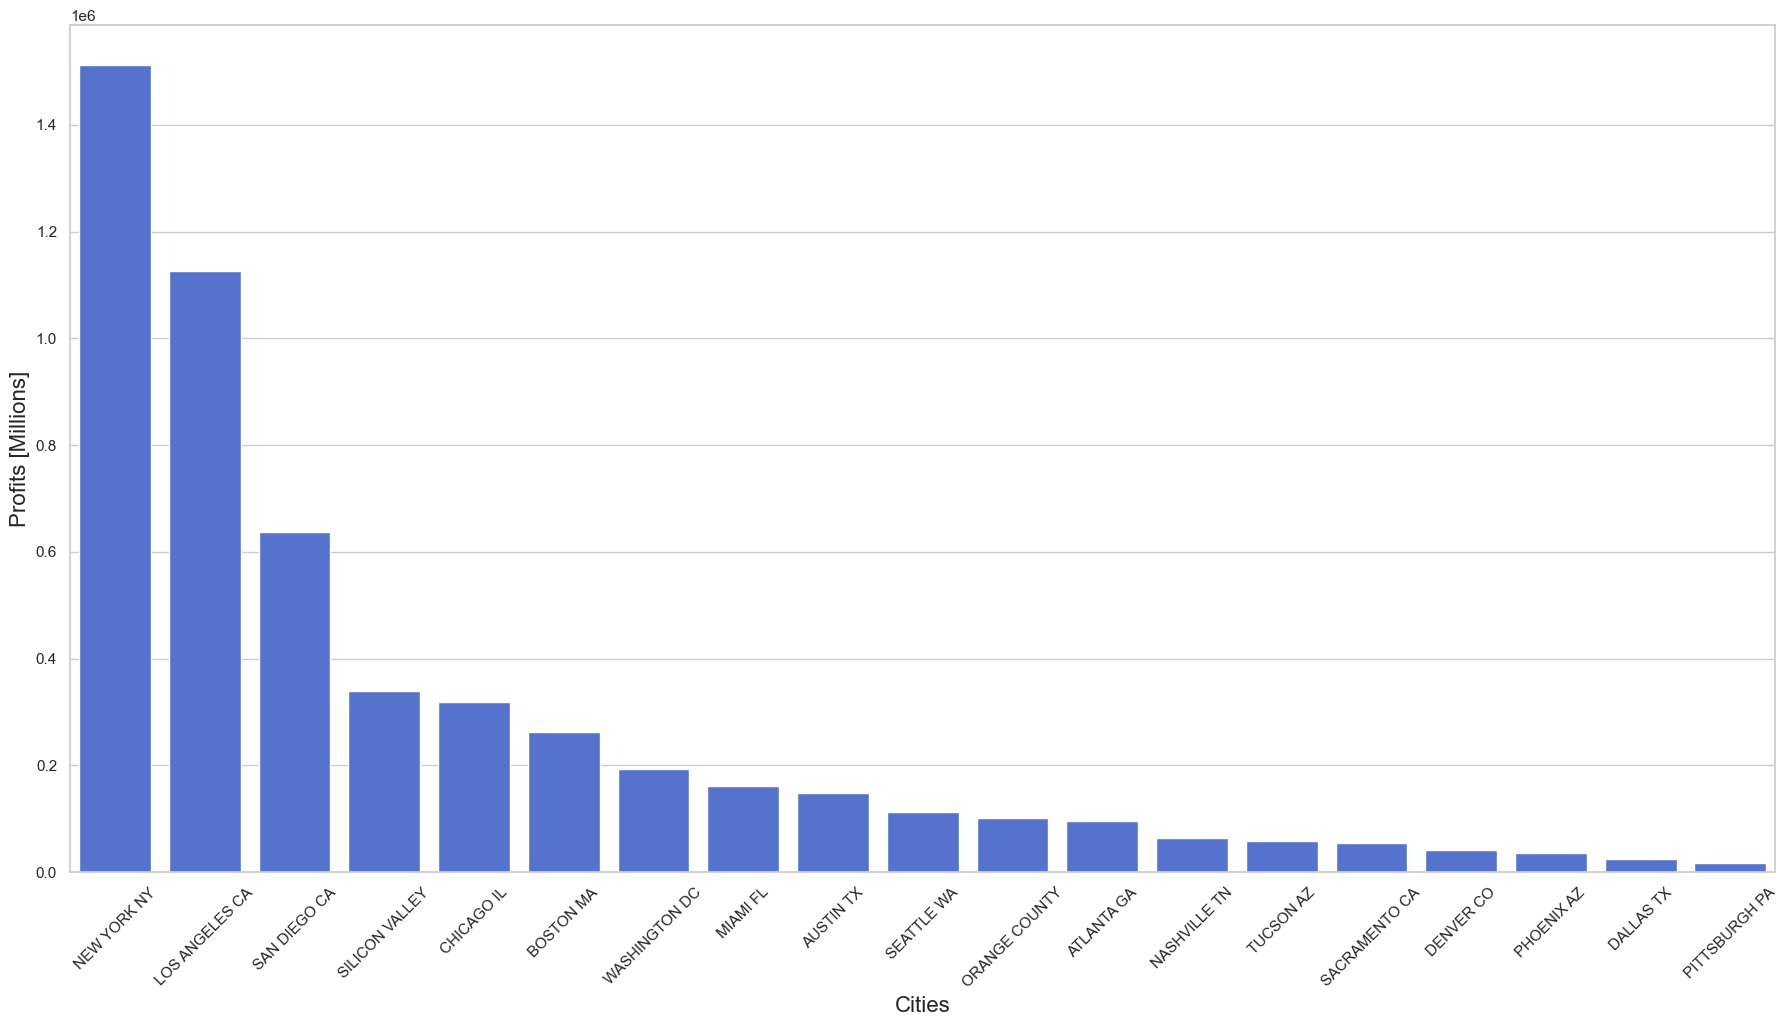

In [67]:
# Due to the number of rides taken, we expect that the yellow cab makes more profit on rides than the pink cab especially in
# the state of New York
# This is also an indicator of high demand in the state of new york for cab services and likely due to an availability of cabs,
# the yellow cab has been dominant
fig, ax  = plt.subplots(figsize=(22,11))
plt.xticks(rotation = 45)
sns.barplot(data=pcp , x="City",y="Profit", color='royalblue')
plt.ylabel('Profits [Millions]', fontsize=16)
plt.xlabel('Cities', fontsize=16)

In [68]:
jointprofit = final_df.groupby(['City','Company']).Profit.sum().to_frame('Profit')
jointprofit.reset_index(inplace=True)
jointprofit = jointprofit.sort_values(by='Profit', ascending= False)

jointprofit=jointprofit.drop([19,18],axis=0)
jointprofit.head(10)

,City,Company,Profit
37,WASHINGTON DC,Yellow Cab,3299103.8087999998
13,LOS ANGELES CA,Yellow Cab,3285976.5808
7,CHICAGO IL,Yellow Cab,3068590.9256
5,BOSTON MA,Yellow Cab,1506717.572
12,LOS ANGELES CA,Pink Cab,1125732.065
9,DALLAS TX,Yellow Cab,1104003.1532
33,SILICON VALLEY,Yellow Cab,976454.7428
29,SAN DIEGO CA,Yellow Cab,949273.7016
1,ATLANTA GA,Yellow Cab,746382.8056
28,SAN DIEGO CA,Pink Cab,637889.769


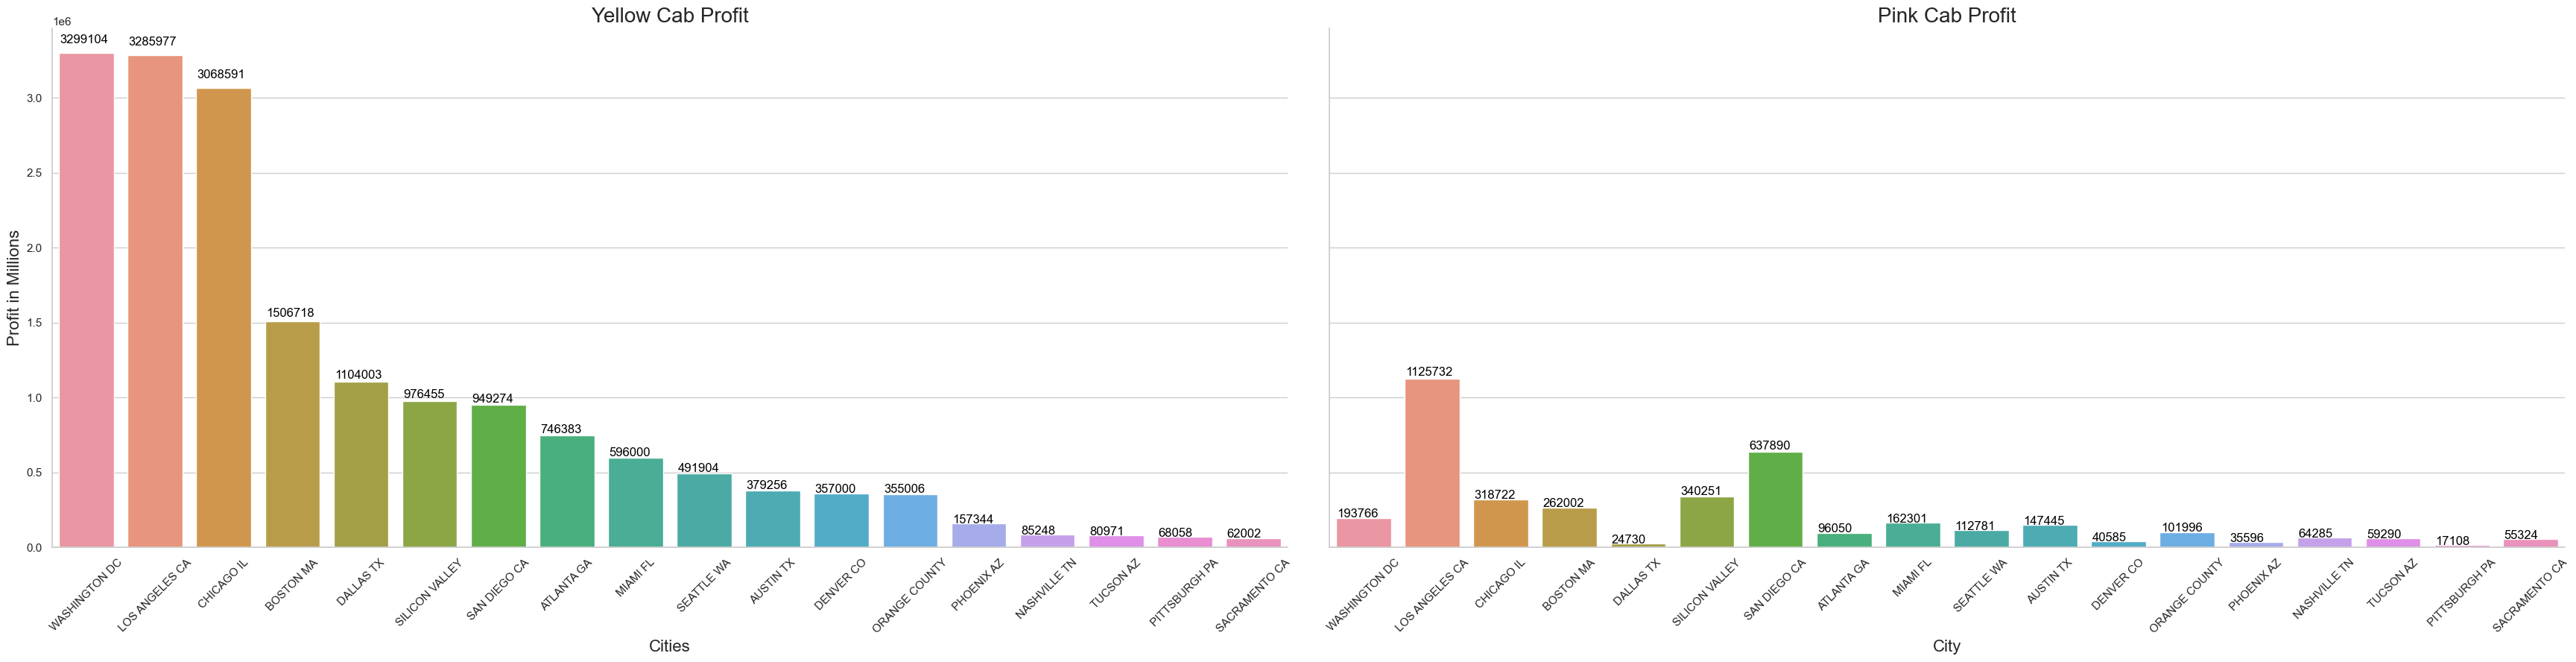

In [69]:
jp = sns.catplot(data=jointprofit, x='City',y='Profit', col= 'Company',
            kind='bar',height=8, aspect=18/8.27)
ax = jp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
plt.ylabel('Profit in Millions', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Yellow Cab Profit',fontsize=20)
plt.xticks(rotation=45)
ax = jp.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
plt.ylabel('Profit in Millions', fontsize=16)
plt.xlabel('City', fontsize=16)
plt.title('Pink Cab Profit',fontsize=20)
plt.xticks(rotation=45)
plt.show()

### CUSTOMER LOYALTY ANALYSIS

In [93]:
# Number for customers that took rides each year

cusy_df = final_df.groupby(['Company',final_df.Date_of_Travel.dt.year]).agg({'Customer_ID': 'count'}).rename(columns={'Customer_ID':'Trip Count'})
cusy_df.reset_index(inplace=True)
cusy_df.head(10)

,Company,Date_of_Travel,Trip Count
0,Pink Cab,2016,25080
1,Pink Cab,2017,30321
2,Pink Cab,2018,29310
3,Yellow Cab,2016,82239
4,Yellow Cab,2017,98189
5,Yellow Cab,2018,94253


In [96]:
cy = cusy_df[cusy_df['Trip Count'] >= 20]

,Company,Date_of_Travel,Trip Count
0,Pink Cab,2016,25080
1,Pink Cab,2017,30321
2,Pink Cab,2018,29310
3,Yellow Cab,2016,82239
4,Yellow Cab,2017,98189
5,Yellow Cab,2018,94253


In [98]:
cusm_df = final_df.groupby(['Company',final_df.Date_of_Travel.dt.to_period('M').rename('Period')]).agg({'Customer_ID': 'count'}).rename(columns={'Customer_ID':'Trip Count'})
cusm_df.reset_index(inplace=True)
cusm_df.head(10)


,Company,Period,Trip Count
0,Pink Cab,2016-01,927
1,Pink Cab,2016-02,1050
2,Pink Cab,2016-03,1231
3,Pink Cab,2016-04,1240
4,Pink Cab,2016-05,1567
5,Pink Cab,2016-06,1730
6,Pink Cab,2016-07,2125
7,Pink Cab,2016-08,2272
8,Pink Cab,2016-09,2854
9,Pink Cab,2016-10,3334


<AxesSubplot: xlabel='Date_of_Travel', ylabel='No.'>

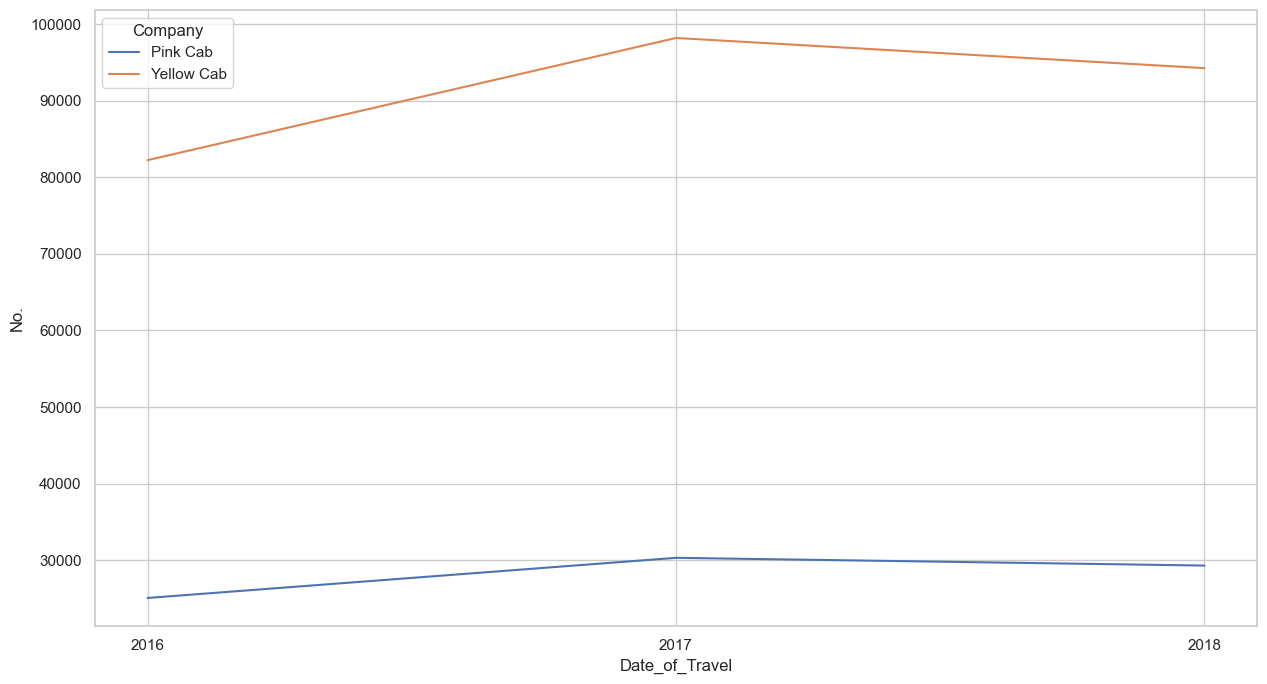

In [91]:
cusy_df.Date_of_Travel = cusy_df.Date_of_Travel.astype('str')

fig, ax  = plt.subplots(figsize=(15,8))
plt.xticks(rotation = 'horizontal')
sns.lineplot(data=cusy_df, x="Date_of_Travel", y="No.", hue="Company")



<AxesSubplot: xlabel='Period', ylabel='Trip Count'>

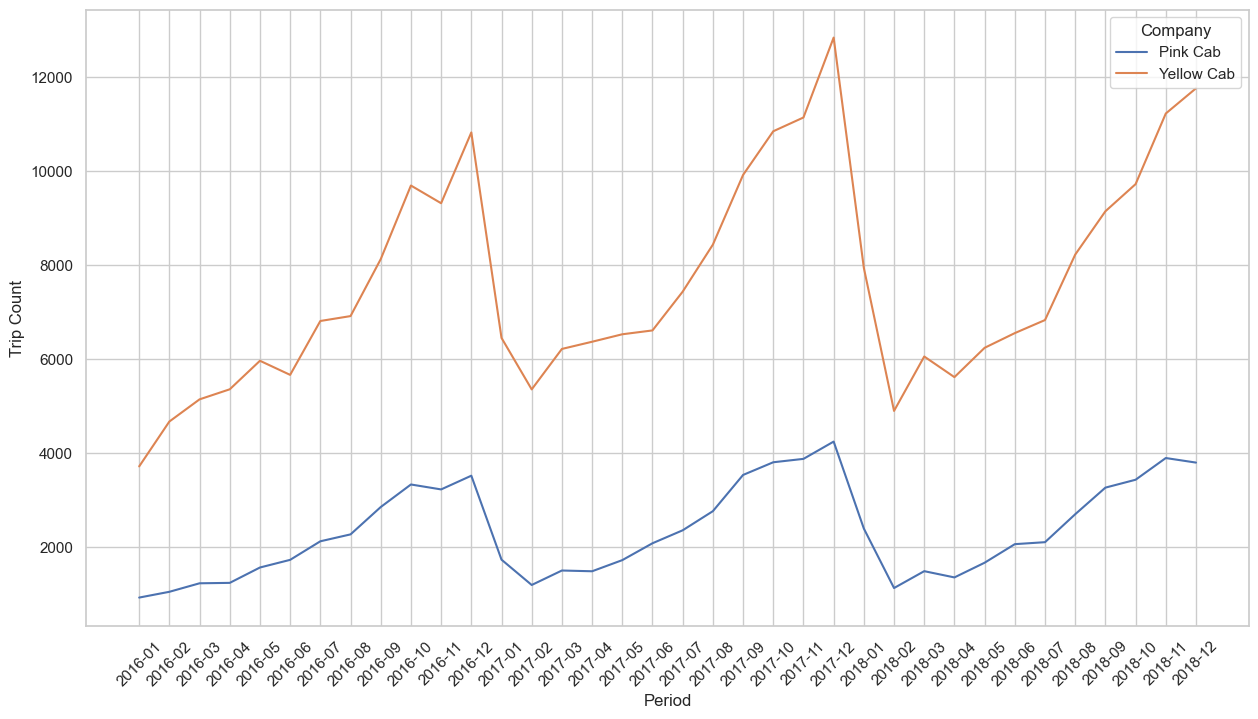

In [104]:
cusm_df.Period = cusm_df.Period.astype('str')

fig, ax  = plt.subplots(figsize=(15,8))
plt.xticks(rotation = 45)
sns.lineplot(data=cusm_df, x="Period", y="Trip Count", hue="Company")

# The graphs show seasonality in the data and based on this, we can see the demand for both cabs is higher towards the end of
# each year. However, Yellow cab maintains significantly higher demand than pink cab as it is most likely more popular

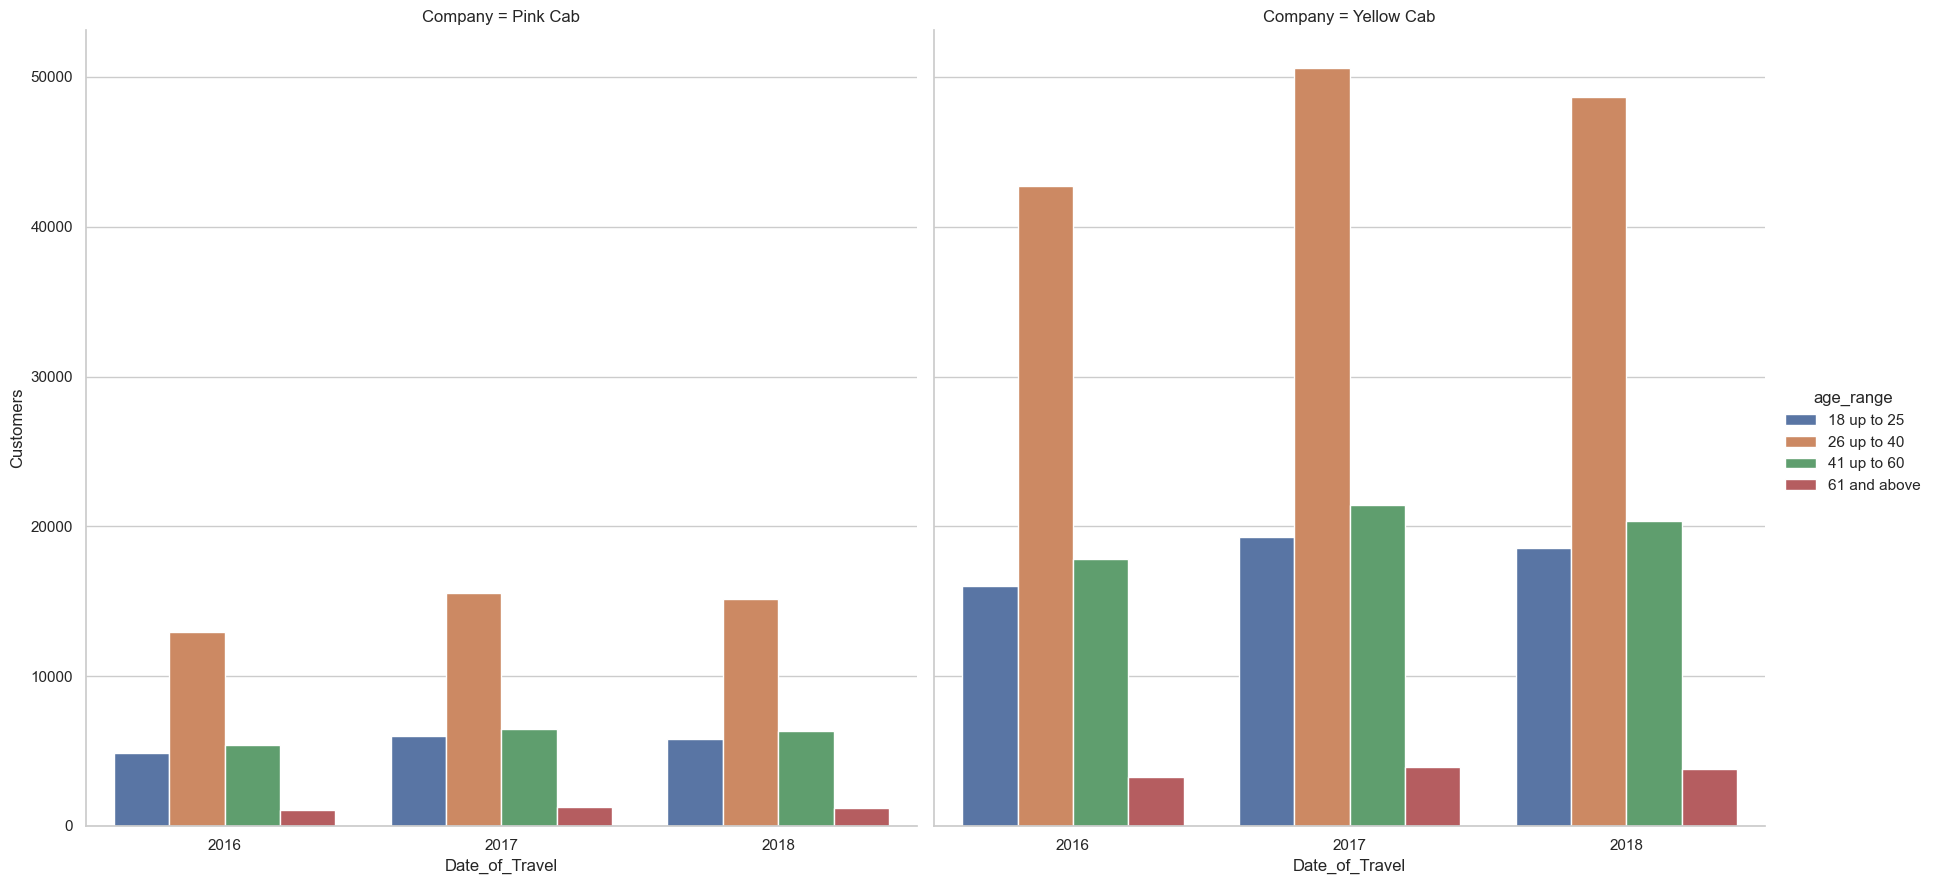

In [145]:
sns.catplot(data=a_range, x='Date_of_Travel',y='Customers', col= 'Company',
            kind='bar',hue='age_range', height=9)
# The result is a bar plot with facets showing the frequency at which different age ranges took rides during each year
# It shows that the highest demand for cab rides falls within the 26 to 40 age range but the yellow cab has higher demand within
# all age ranges overall than the pink cab